# import libraries

In [51]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

from sklearn.externals.six import StringIO   
from IPython.display import display, Image
from sklearn.tree import export_graphviz
import pydotplus

# Read the file and put it into panda's data frame

In [52]:
fname = 'heart.csv'
df = pd.read_csv(fname)

In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# preprocess the data

In [54]:
# df_target_infected = df[df["target"]==0]
# df_target_uninfected=df[df["target"]==1]

# Visualise the correlation between the columns

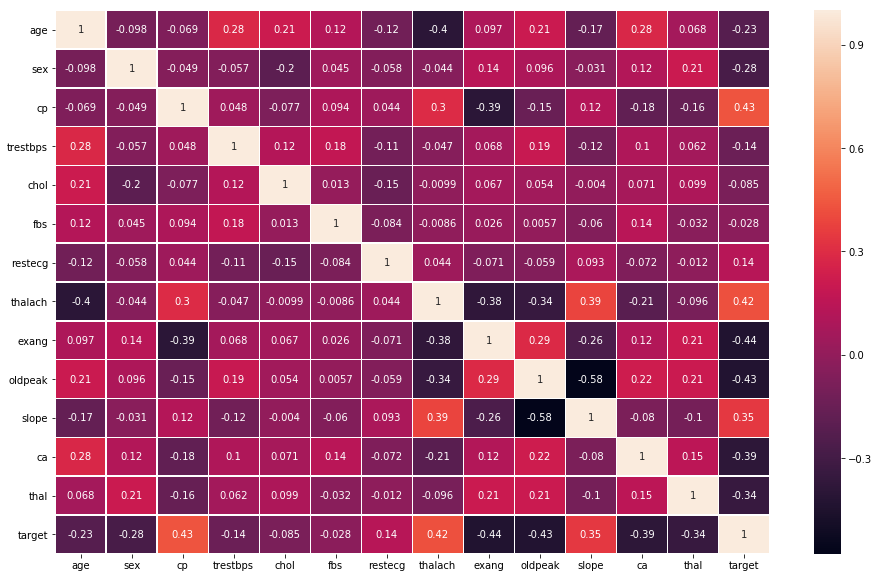

In [55]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True,linewidths=.5)

## generate pair plot diagrams to figure out the relationship between columns

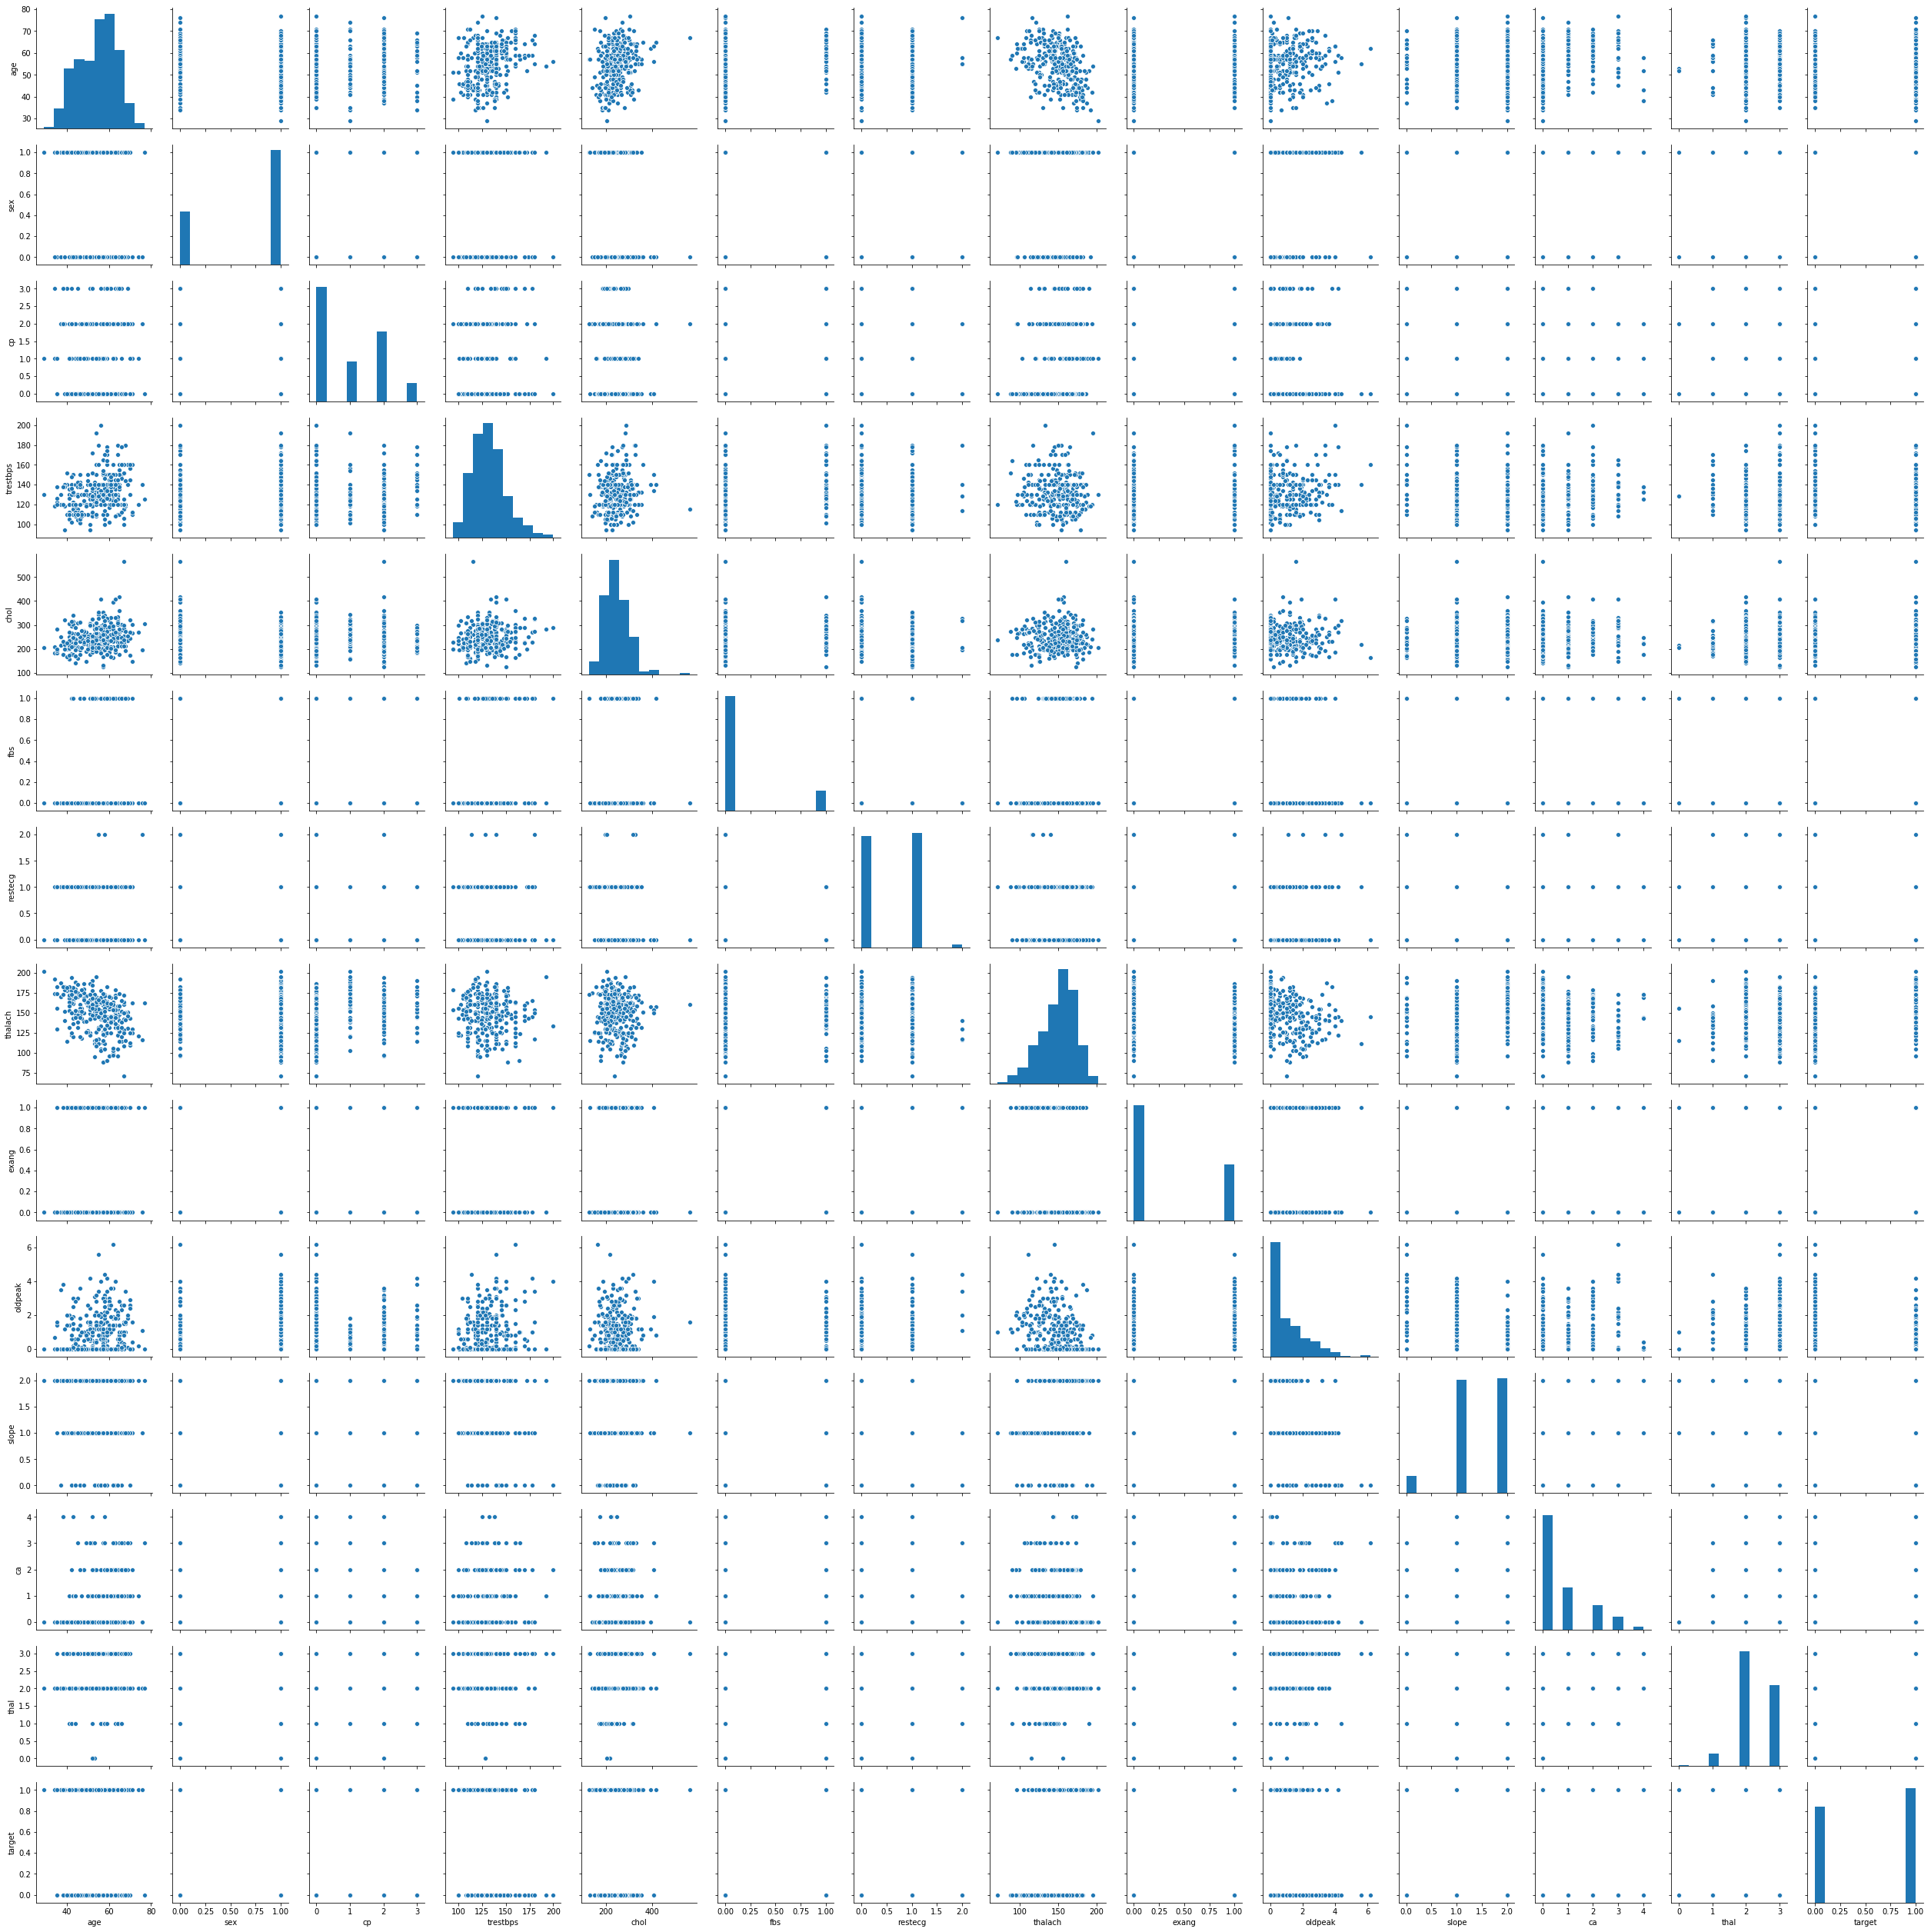

In [56]:
sns.pairplot(df)

# self defined function to return accuracy score , confusion matrix and model

In [70]:
def funct(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42 )
    model = DecisionTreeClassifier(max_leaf_nodes=3)
    
    import time
    start = time.time()
    model.fit(X_train,y_train)
    end = time.time()
    y_p = model.predict(X_test)
    a_score = accuracy_score(y_test,y_p)
    con_mat = confusion_matrix(y_test, y_p)
    
    model_rf = RandomForestClassifier(n_estimators = 100)
    start_rf = time.time()
    model_rf.fit(X_train,y_train)
    end_rf = time.time()
    y_p_rf = model_rf.predict(X_test)
    a_score_rf = accuracy_score(y_test,y_p_rf)
    con_mat_rf = confusion_matrix(y_test, y_p_rf)
#     print(end-start,"sec")
    print(a_score_rf)
    
    return [a_score,con_mat,model,end-start],[a_score_rf,con_mat_rf,model_rf,end_rf-start_rf]

# dictionary of independant columns for training

In [71]:
dic={
    1:["chol","trestbps"],
    2:["thalach","oldpeak"],
    3:["thalach","oldpeak","cp"],
    4:["thalach","oldpeak","cp","exang"],
    5:["thalach","oldpeak","cp","exang","slope"]
}

# data dictionary

In [72]:
dic_new={}
for key,val in dic.items():
    X = df.loc[:,val]
    y = df.iloc[:, -1]
#     acc_score,con_mat,model,time = funct(X,y)
    dt,rf = funct(X,y)
    acc_score,con_mat,model,time = dt
    a_score_rf,con_mat_rf,model_rf,time_rf = rf
    dic_new['_'.join(val)] = [[acc_score,con_mat,model,time],[a_score_rf,con_mat_rf,model_rf,time_rf]]
    
    

0.5737704918032787
0.6557377049180327
0.7704918032786885
0.819672131147541
0.7540983606557377


# Finding  the accuracy score and confusion matrix and the DECISION TREE

**********chol_trestbps**********

accuracy_core : 0.5737704918032787
time elapsed :  0.0019404888153076172 sec
confucion_matrix :


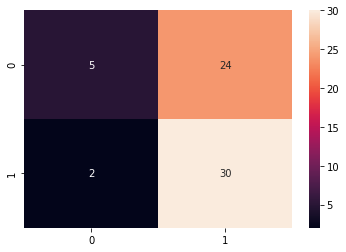

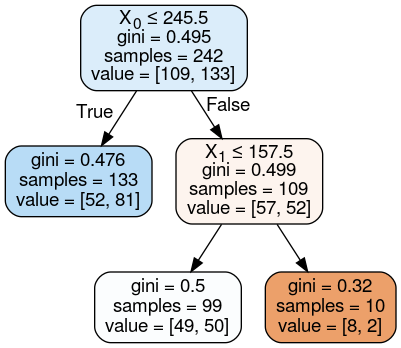

**********thalach_oldpeak**********

accuracy_core : 0.7213114754098361
time elapsed :  0.0013625621795654297 sec
confucion_matrix :


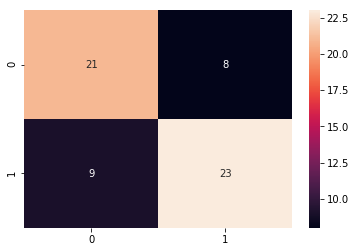

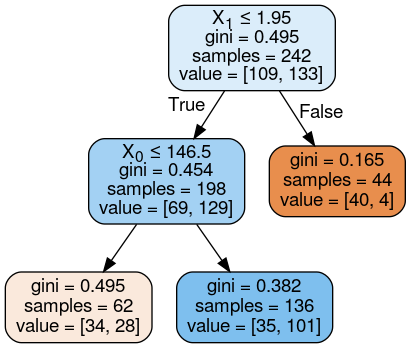

**********thalach_oldpeak_cp**********

accuracy_core : 0.7868852459016393
time elapsed :  0.0014171600341796875 sec
confucion_matrix :


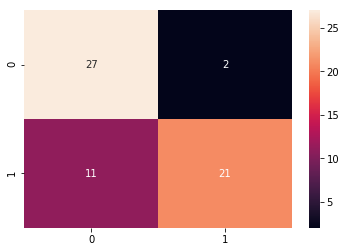

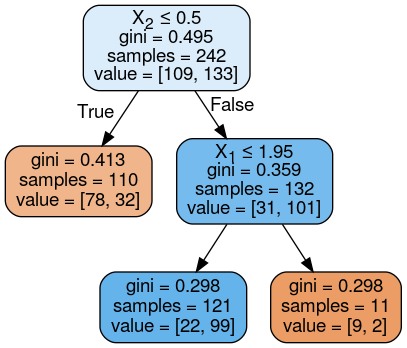

**********thalach_oldpeak_cp_exang**********

accuracy_core : 0.7377049180327869
time elapsed :  0.0012917518615722656 sec
confucion_matrix :


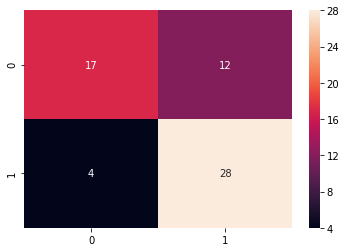

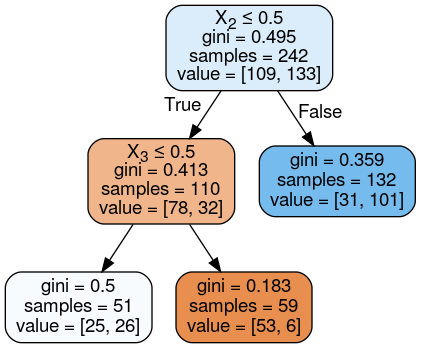

**********thalach_oldpeak_cp_exang_slope**********

accuracy_core : 0.7377049180327869
time elapsed :  0.0012478828430175781 sec
confucion_matrix :


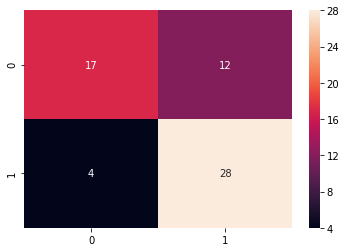

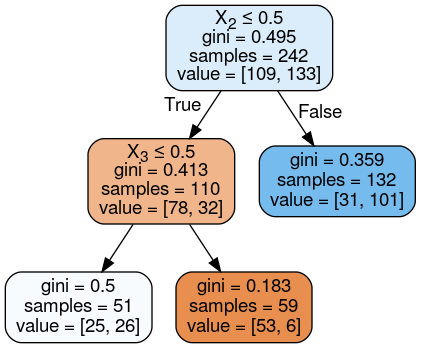

In [74]:
for k,v in dic_new.items():
    print("**********"+k+"**********")
    print()
    print("accuracy_core :",v[0][0] )
    print("time elapsed : ",v[0][3],"sec")
    print("confucion_matrix :")
    sns.heatmap(v[0][1],annot=True, fmt="d" )
    plt.show()
    
    dot_data = StringIO()
    export_graphviz(v[0][2], out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))


## A score of 0.7377049180327869 is obtained when thalach , oldpeak , cp , exang and slope are the inputs

## The max score of 0.7868852459016393 is obtained when thalach and  oldpeak are the inputs

# Finding the accuracy score and confusion matrix and the RANDOM FOREST

**********chol_trestbps**********

accuracy_core : 0.5737704918032787
time elapsed :  0.08995819091796875 sec
confucion_matrix :


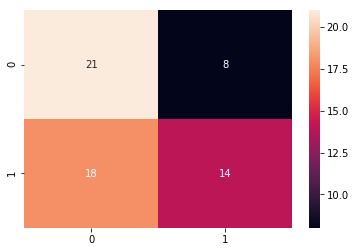

**********thalach_oldpeak**********

accuracy_core : 0.6557377049180327
time elapsed :  0.060263633728027344 sec
confucion_matrix :


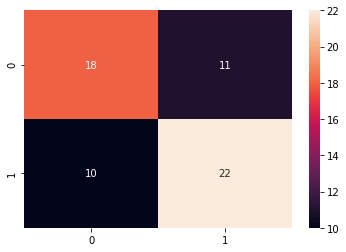

**********thalach_oldpeak_cp**********

accuracy_core : 0.7704918032786885
time elapsed :  0.06828618049621582 sec
confucion_matrix :


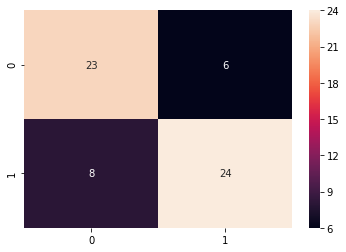

**********thalach_oldpeak_cp_exang**********

accuracy_core : 0.819672131147541
time elapsed :  0.07621526718139648 sec
confucion_matrix :


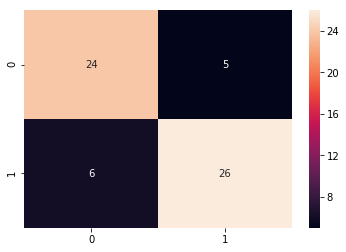

**********thalach_oldpeak_cp_exang_slope**********

accuracy_core : 0.7540983606557377
time elapsed :  0.06003427505493164 sec
confucion_matrix :


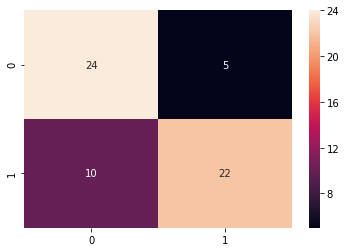

In [75]:
for k,v in dic_new.items():
    print("**********"+k+"**********")
    print()
    print("accuracy_core :",v[1][0] )
    print("time elapsed : ",v[1][3],"sec")
    print("confucion_matrix :")
    sns.heatmap(v[1][1],annot=True, fmt="d" )
    plt.show()
    

## A score of 0.7540983606557377 is obtained when thalach , oldpeak , cp , exang and slope are the inputs

## The max score of 0.819672131147541 is obtained when thalach, oldpeak, cp and exang  are given the inputs